# US companies and industry landscape with Crunchbase  Data 

**Overview**
In order to get a better understanding of companies and industry landscape in US,  we analyzed companies distributions, funding amounts, and aquisition trends in US using the Crunchbase data. 
This file consists of the following sections: 
<li> Enviroment Configuration 
<li> Data Preparation 
<li> Data Visualization    
       

# 1. Environment Configuration

#### Step 1. Set up Google Authorization for Google Drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .


Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setti

#### Step 2. Mount Google Drive  to drive folder

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

####  Step 3. Install libraries and dependencies   
Import the following modules in Python3.   

In [9]:
! pip install xlrd

    100% |████████████████████████████████| 112kB 3.1MB/s 


In [10]:
! pip install wordcloud

    100% |████████████████████████████████| 174kB 4.9MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


In [0]:
import pandas as pd
import numpy as np
import io
import csv
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from IPython.display import Image
import matplotlib.image as mpimg

# 2. Data Preparation

### 1. Import Data   
This project used the following four datasets, which are available in  (**Datasource**: [Crunchbase data](https://data.crunchbase.com/docs) ) 
 

In [0]:
company= pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx',"Companies")
investment = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Investments")
acquisition = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Acquisitions")
rounds = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Rounds")

### 2. Data Information

This project used the following four datasets, which are available in  (**Datasource**: [Crunchbase data](https://data.crunchbase.com/docs) ) 

|Table | Number of Entries |Contents |
|--|--|--|
| `company` |49,438  | <li>regional onformation <li>market/ industry information<li>funding status  |
|`investment` |114,506|<li>companies's information <li>investor's <li>funding information |
| `acquisition` |  55,240|<li>companies and its acquirer's  information <li>price_amount of money the acquirer paid|
|`rounds `|83,870|<li>companies' information <li>funding status <li>amount of money rasied| 

#### 1. `Company` dataset:
This dataset has 49,438 entires and has records regarding companies' regional information, market/ industry information and also their funding status. 

In [13]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 18 columns):
permalink            49438 non-null object
name                 49437 non-null object
homepage_url         45989 non-null object
category_list        45477 non-null object
market               45470 non-null object
funding_total_usd    49438 non-null int64
status               48124 non-null object
country_code         44165 non-null object
state_code           30161 non-null object
region               44165 non-null object
city                 43322 non-null object
funding_rounds       49438 non-null int64
founded_at           38554 non-null object
founded_month        38482 non-null object
founded_quarter      38482 non-null object
founded_year         38482 non-null float64
first_funding_at     49438 non-null object
last_funding_at      49438 non-null object
dtypes: float64(1), int64(2), object(15)
memory usage: 6.8+ MB


#### 2. `investment`  dataset :
The `investment` dataset has 114,506 entires and covers three main parts: companies's , investor's  and the funding information.

In [14]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 24 columns):
company_permalink          114506 non-null object
company_name               114505 non-null object
company_category_list      111242 non-null object
company_market             111240 non-null object
company_country_code       107147 non-null object
company_state_code         79158 non-null object
company_region             107147 non-null object
company_city               105801 non-null object
investor_permalink         114440 non-null object
investor_name              114440 non-null object
investor_category_list     30507 non-null object
investor_market            30455 non-null object
investor_country_code      86521 non-null object
investor_state_code        62274 non-null object
investor_region            86521 non-null object
investor_city              86007 non-null object
funding_round_permalink    114506 non-null object
funding_round_type         114506 non-null obj

#### 3. `acquisition`: 
This dataset has 55,240 records which includes companies and its acquirer's basic information together with the price_amount of money the acquirer paid.  

In [15]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 22 columns):
company_permalink         13070 non-null object
company_name              13070 non-null object
company_category_list     9787 non-null object
company_market            9785 non-null object
company_country_code      9783 non-null object
company_state_code        7519 non-null object
company_region            9784 non-null object
company_city              9585 non-null object
acquirer_permalink        13070 non-null object
acquirer_name             13070 non-null object
acquirer_category_list    11565 non-null object
acquirer_market           11559 non-null object
acquirer_country_code     12229 non-null object
acquirer_state_code       9782 non-null object
acquirer_region           12229 non-null object
acquirer_city             12110 non-null object
acquired_at               13070 non-null object
acquired_month            13068 non-null object
acquired_quarter          13068 no

#### 4. `rounds`: 
This dataset has 83,870 entries which contains the companies' basic information the funding status and also the amount of money rasied. 

In [16]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83870 entries, 0 to 83869
Data columns (total 16 columns):
company_permalink          83870 non-null object
company_name               83869 non-null object
company_category_list      79424 non-null object
company_market             79417 non-null object
company_country_code       77304 non-null object
company_state_code         56497 non-null object
company_region             77304 non-null object
company_city               76223 non-null object
funding_round_permalink    83870 non-null object
funding_round_type         83870 non-null object
funding_round_code         22870 non-null object
funded_at                  83870 non-null object
funded_month               83860 non-null object
funded_quarter             83860 non-null object
funded_year                83860 non-null float64
raised_amount_usd          71039 non-null float64
dtypes: float64(2), object(14)
memory usage: 10.2+ MB


### 3. Data cleaning

** Subset the data entries for companies only based in USA**:  
> <li> For the `Acquisition` data: 
The number of region information is not normally distributed, which skewed on USA side (97.97% is paid in USD, and nearly 77% of the acquisition company is based in USA). So we filtered those data entries by 
1. `company_country_code=='USA'`  
1. `price_currency_code=='USD'` 

In [17]:
print(acquisition.price_currency_code.value_counts()/acquisition.price_currency_code.value_counts().sum())

USD    0.979718
EUR    0.008801
GBP    0.008266
CAD    0.001225
AUD    0.000765
JPY    0.000536
SEK    0.000306
NZD    0.000153
AZN    0.000077
SAR    0.000077
NOK    0.000077
Name: price_currency_code, dtype: float64


In [18]:
# The top 5 country acquisition by countries
acquisition.company_country_code.value_counts()[:5]

USA    7177
GBR     646
CAN     348
DEU     206
FRA     138
Name: company_country_code, dtype: int64

In [0]:
# Focus only on USA startups.
USA = company[company.country_code == 'USA'] 
USA.dropna(subset = ['status','state_code'],inplace = True)

In [0]:
acquisition=acquisition[acquisition.company_country_code=='USA']
acquisition=acquisition[acquisition.price_currency_code=='USD']

#3.  Data Visualization

 ## Content Overview  
We deep dive into the Crunchbase data and do anlysis in regards to:
<li> Company's numbers and distributions   
<li> Investments in industry  
<li> Funding amount and compositions  



## 1. The total number of companies in each state in US from 1960-2014:  
This graph was generated using Tableau, showing a basic regional distribution of the companies in US. 


*   California has the most number of start-ups, the number of which is way greater than the second state, New York.


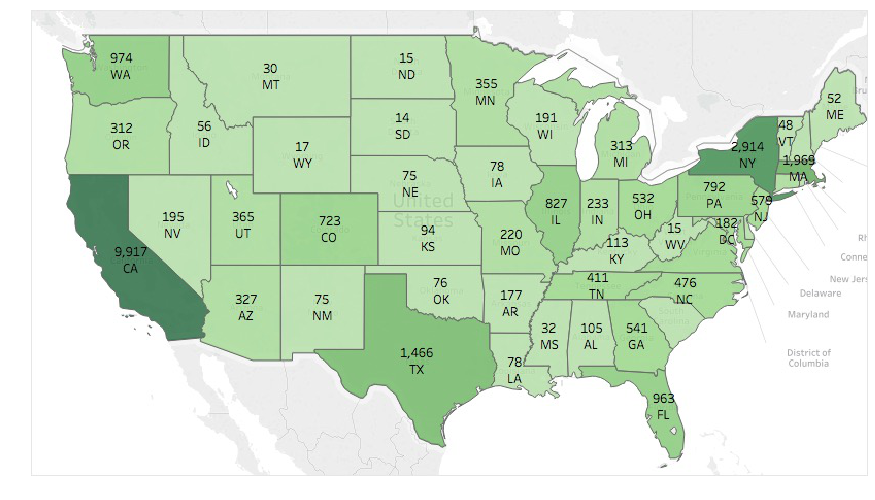

In [22]:
img = mpimg.imread('drive/data_viz/WechatIMG1622.jpeg') 
plt.imshow(img) 
plt.axis('off') 
fig=plt.gcf()
fig.set_size_inches(15,10) 
plt.show()

## 2. Top 20 companies that have raised the most money.

Among all of those founded companies that got investments, what are the top 20 companies that have raised the most money? 


*   The top 20 most-funded companies are mainly inovative companies.





In [0]:
invest_amount = investment[['company_name','raised_amount_usd']].dropna()
invest_amount['raised_amount_usd_Million'] = invest_amount['raised_amount_usd']/10000000 # change the dollar amount unit to million
top20_companies_raised_most_money = invest_amount.groupby('company_name',as_index = False)['raised_amount_usd_Million'].sum().sort_values(
    by = 'raised_amount_usd_Million', ascending = False).head(20) # get the top 20 companies that have raised the most money 

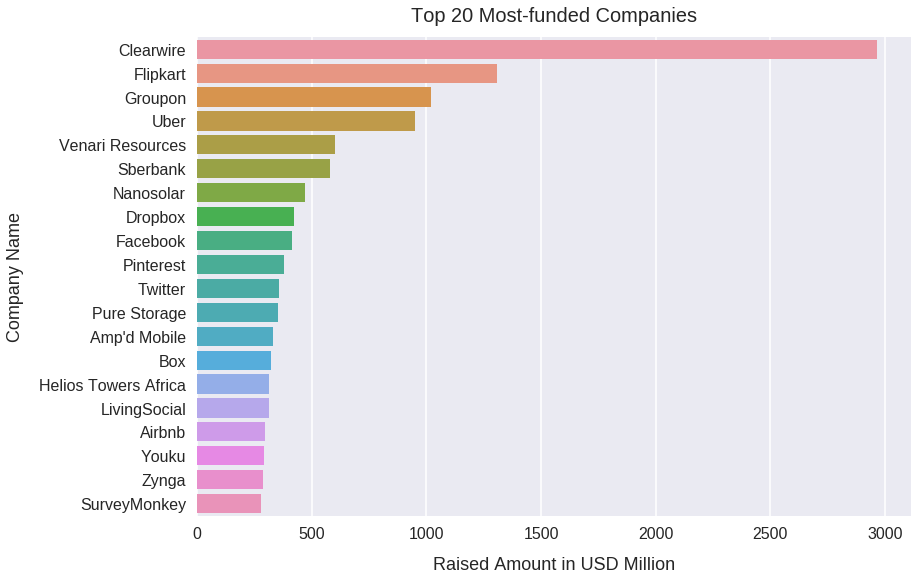

In [24]:
sns.set_context('poster')
sns.barplot(x='raised_amount_usd_Million',y='company_name',data=top20_companies_raised_most_money, orient = 'h')
plt.title('Top 20 Most-funded Companies', fontsize = 20, y =1.02)
plt.ylabel('Company Name', fontsize = 18, labelpad = 15)
plt.xlabel('Raised Amount in USD Million', fontsize = 18, labelpad = 15);

##3. Number of companies founded and got acquired from year 2000 to 2013


The trend of the number of companies founded and acquired over years.

*   Entrepreneurship is on an upward trend. 
*   Whether the crises have impacts on Entrepreneurship trend: 1) After financial crisis in 2008, there is a continuous climbing up of number of companies founded, looks like a economic revival, but the acquisition slow down a little bit. 2) However, after crisis of 2012, the number of companies founded has a sharp decrease. We can tell the crisis that countries and banks struggle to get balances sheets  has much negative impact on starting a company. In the contrast, acquisition activities have increased slightly. 


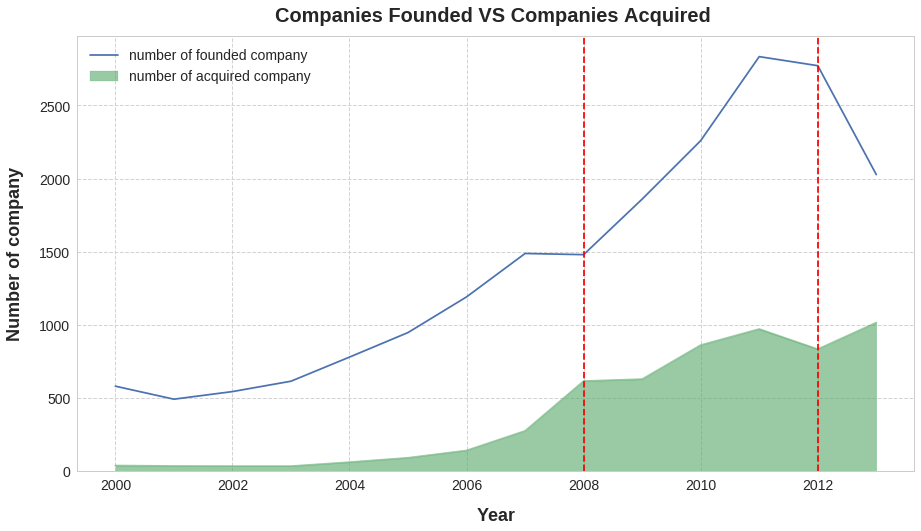

In [25]:
sns.set(style="whitegrid")
USA[(USA.founded_year >= 2000) & (USA.founded_year <= 2013)].groupby('founded_year').size().to_frame().reset_index().rename(columns={'founded_year':'year', 0:'number of founded company'}).\
set_index('year')['number of founded company'].plot(grid = True, legend = True)
acquisition[(acquisition.company_country_code == 'USA') & (acquisition.acquired_year >= 2000) & (acquisition.acquired_year <= 2013)].groupby('acquired_year').size().to_frame().reset_index().\
rename(columns={'acquired_year':'year', 0:'number of acquired company'}).set_index('year')['number of acquired company'].\
plot(kind = 'area',grid = True, figsize = (15,8), legend = True, alpha = 0.6)
plt.xlabel('Year', fontsize = 18, weight='bold', labelpad = 15)
plt.ylabel('Number of company', fontsize = 18, weight='bold', labelpad = 15)
plt.title('Companies Founded VS Companies Acquired ', weight='bold', fontsize = 20, y = 1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc="upper left", markerscale=1.5, frameon=False)
plt.axvline(x=2008, color='red',linestyle='--')
plt.axvline(x=2012, color='red',linestyle='--');

![FinancialCrisis](https://media.brstatic.com/2017/03/20162408/economics_euro-crisis-timeline-1999.jpg)

## 4. Wordcloud on hot topics in market analysis 

The wordcloud below shows the hot topics in the market. 


*   From the worldcloud picture, we can see that the hottest industries that attract the investor are software and Internet related. 



In [0]:
acquisition_data=acquisition.copy()
text='start '
for ele in acquisition_data.company_market.dropna():
    text=text +' '+ ele

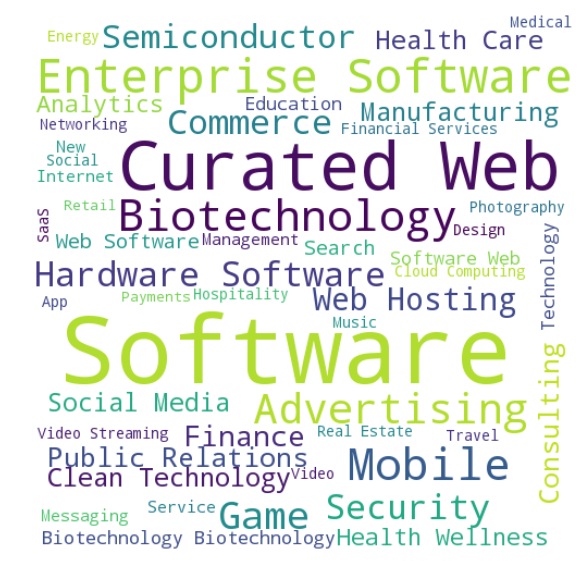

In [27]:
wordcloud = WordCloud(width=500, height=500,background_color='white', max_words=50).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(18,10) 

## 5. How long it takes for a startup in the top 15 markets to be acquired


Exit time for companies in the top 15 markets. 
*   Among the top 15 markets, majority of the companies got acquried within 5-10 years. 
*   Consulting companies took much longer time to be acquired. 





In [0]:
acquired_company_market = acquisition[['company_market']].dropna()
acquired_number_per_market = acquired_company_market.groupby('company_market').size().sort_values(ascending = False).\
to_frame().reset_index().rename(columns={0:'number_of_companies'})
top15_acquired_markets = acquired_number_per_market.head(15)

In [0]:
founded = company[['name','founded_year']].dropna()
acquired = acquisition[['company_name','company_market','acquired_year']].dropna()
founded_acquired = acquired.merge(founded, left_on = 'company_name', right_on = 'name', how = 'inner')
top15_markets_founded_acquired = founded_acquired[founded_acquired.company_market.isin(top15_acquired_markets.company_market)]
top15_markets_founded_acquired['years_to_acq'] = top15_markets_founded_acquired['acquired_year'] - top15_markets_founded_acquired['founded_year']
top15_markets_founded_acquired = top15_markets_founded_acquired[(top15_markets_founded_acquired['years_to_acq'] > 0)
                                          & (top15_markets_founded_acquired['years_to_acq'] <= 100)]
order_markets_by_median_years_acq = top15_markets_founded_acquired.groupby('company_market', as_index = False)[['years_to_acq']].median().sort_values(
    by='years_to_acq').company_market

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

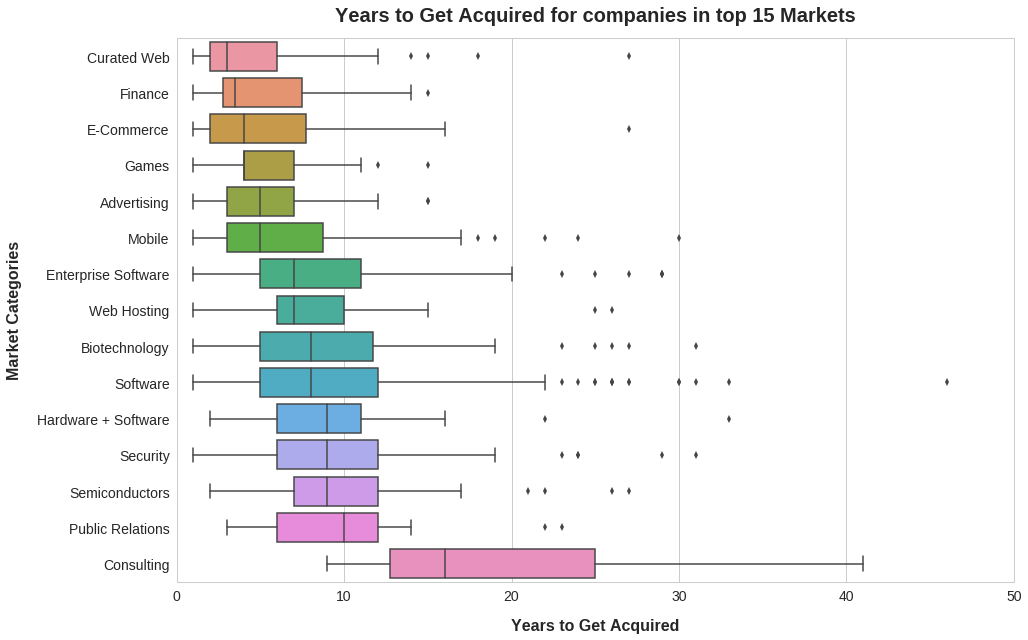

In [30]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'years_to_acq',y = 'company_market', ax=ax, linewidth = 1.5, data = top15_markets_founded_acquired,
               order = order_markets_by_median_years_acq)
plt.xlim([0, 50])
plt.title('Years to Get Acquired for companies in top 15 Markets', fontsize = 20, weight='bold', y=1.02)
plt.xlabel('Years to Get Acquired', fontsize = 16, weight='bold', labelpad = 15)
plt.ylabel('Market Categories', fontsize = 16, weight='bold', labelpad = 15);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## 6. How the total money spent for acqusition in top 5 market changes over time? 

The trend of money goes into each market from 2007 to 2014 



*  Biotechnology is large part of money going to acquisition
*  Pure software in terms of acquistion is shrinking compared to whole software market
*  Mobile is growing and curated web is basically gone Enterprise software seems constant







In [0]:
df = acquisition.copy()
# Limiting to US market, over 2007, price_amount>$100,000
df = df[(df.company_country_code=="USA") & (df.price_currency_code=="USD") & (df.acquired_year > 2006) & (df.price_amount > 100000)]
df["acquired_year"] = df["acquired_year"].astype(int)
top5_market = df.groupby("company_market").size().sort_values(ascending = False\
                                                                       ).head(5).reset_index().company_market
df_in_top5_market = df[df.company_market.isin(top5_market)]

In [0]:
acquired_amount_in_top5_market = df_in_top5_market.groupby(["acquired_year", "company_market"]).agg({"price_amount" : "sum"}).reset_index()
acquired_amount_in_top5_market.price_amount = acquired_amount_in_top5_market.price_amount.apply(lambda x: x/100000000)
acquired_amount_in_top5_market_pivot = pd.pivot_table(acquired_amount_in_top5_market, values = "price_amount", index = "acquired_year", columns = "company_market")

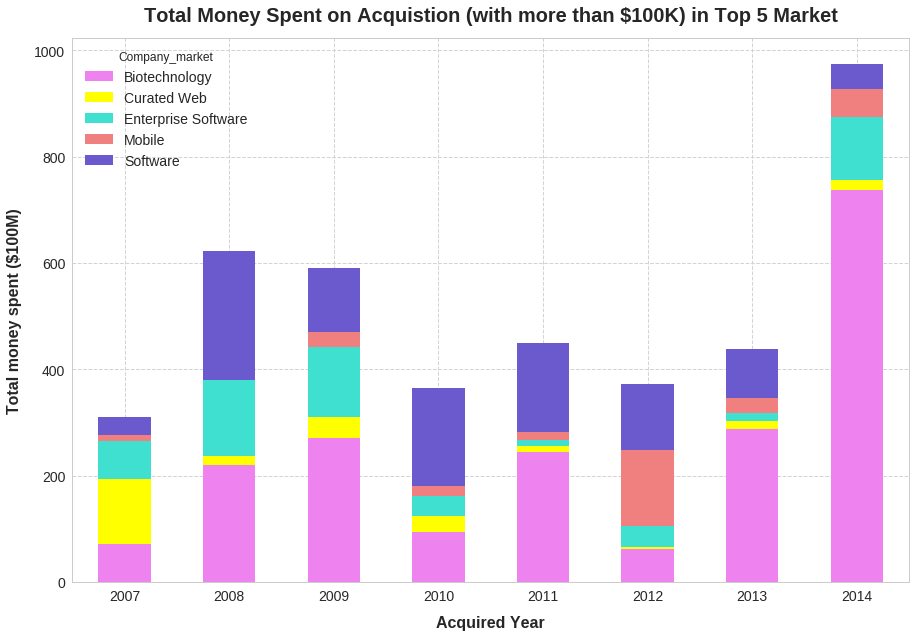

In [40]:
acquired_amount_in_top5_market_pivot.plot(kind = "bar", figsize = (15,10), color = new_colors, stacked = True)
plt.ylabel("Total money spent ($100M)", fontsize=16, labelpad=12, weight='bold')
plt.xlabel("Acquired Year", fontsize=16, labelpad=12, weight='bold')
plt.xticks(rotation = 360, fontsize=14)
plt.yticks(rotation = 360, fontsize=14)
plt.title("Total Money Spent on Acquistion (with more than $100K) in Top 5 Market", fontsize=20, weight='bold', y=1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=14, title="Company_market", loc="upper left", markerscale=1.5, frameon=False);

## 7. How the number of acquired companies in Top 5 market changes over time? 

The trend of market with popular acquisition target from 2007 to 2014


*   Number of acquisition on mobile is steadly growing
*   There are cheap acquisitions for curated web companies and pure software companies



In [0]:
acquired_companies_in_top5_market = df_in_top5_market.groupby(["acquired_year", "company_market"]).size().reset_index()
acquired_companies_in_top5_market_pivot = pd.pivot_table(acquired_companies_in_top5_market, index = "acquired_year", values = 0, columns = "company_market")

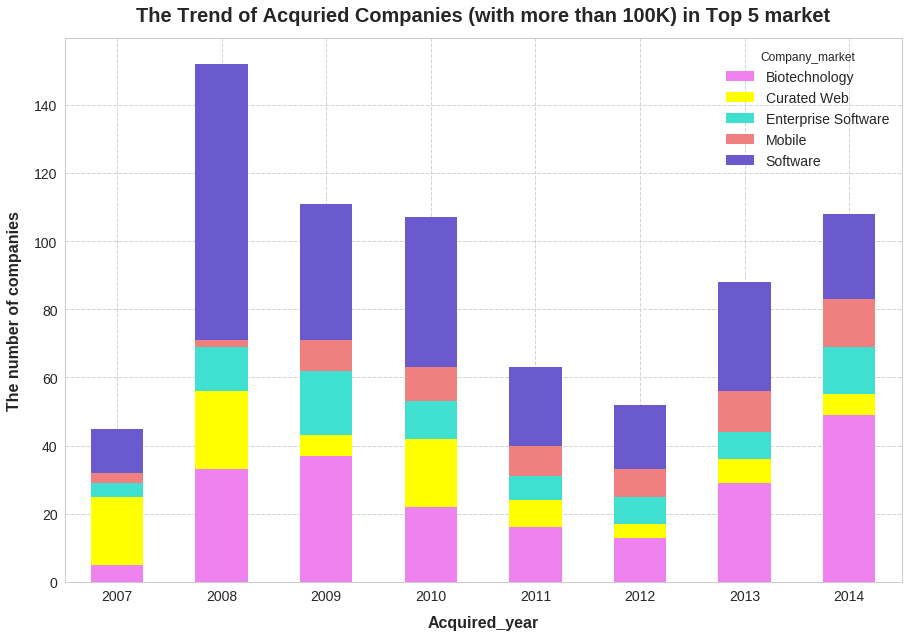

In [42]:
#color platte
new_colors = ["violet", "yellow", "turquoise", "lightcoral", "slateblue"]
#plot code
acquired_companies_in_top5_market_pivot.plot(kind = "bar", figsize = (15,10), color=new_colors, stacked = True)
plt.ylabel("The number of companies", fontsize=16, weight='bold', labelpad=12)
plt.xlabel("Acquired_year", fontsize=16, weight='bold', labelpad=12)
plt.xticks(rotation = 360, fontsize=14)
plt.yticks(rotation = 360, fontsize=14)
plt.title("The Trend of Acquried Companies (with more than 100K) in Top 5 market", weight='bold', fontsize=20, y=1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=14, title="Company_market", loc="upper right", markerscale=1.5, frameon=False);

## 8. How the total money spent for acqusition in top 5 state changes over time?

Money going into acquisition per state from 2007 to 2014


*   There was a huge spike of acqusition around 2014 across USA 
*   California became huge part of acquisition



In [0]:
top5_state = df.groupby("company_state_code")["company_name"].count().sort_values(ascending = False)[:5].reset_index().company_state_code
df_in_top5_state = df[df.company_state_code.isin(top5_state)]
acquired_companies_in_top5_state = df_in_top5_state.groupby(["acquired_year", 'company_state_code']).agg({"company_name" : "count"}).reset_index()
acquired_companies_in_top5_state_pivot = pd.pivot_table(acquired_companies_in_top5_state, index = "acquired_year", values = "company_name", columns = "company_state_code")

In [0]:
acquired_amount_in_top5_state = df_in_top5_state.groupby(["acquired_year", 'company_state_code']).agg({"price_amount" : "sum"}).reset_index()
acquired_amount_in_top5_state.price_amount = acquired_amount_in_top5_state.price_amount.apply(lambda x: x/100000000)
acquired_amount_in_top5_state_pivot = pd.pivot_table(acquired_amount_in_top5_state, index = "acquired_year", values = "price_amount", columns = "company_state_code")

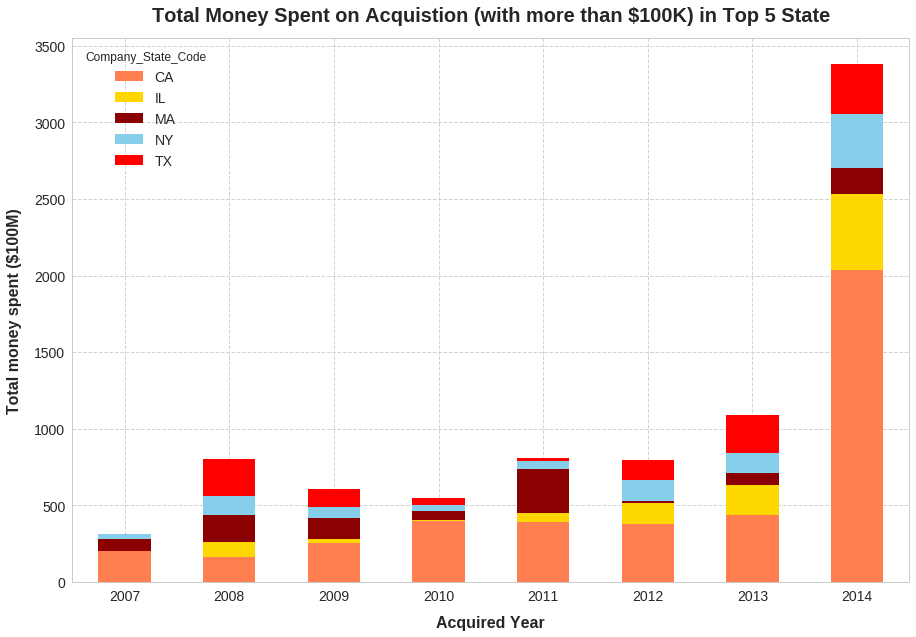

In [130]:
#color platte
color_set = ["coral", "gold", "darkred", "skyblue", "red"]
#plot code
acquired_amount_in_top5_state_pivot.plot(kind = "bar", figsize = (15,10), color = color_set, stacked = True)
plt.ylabel("Total money spent ($100M)", fontsize=16, labelpad=12, weight='bold')
plt.xlabel("Acquired Year", fontsize=16, labelpad=12, weight='bold')
plt.xticks(rotation = 360, fontsize=14)
plt.yticks(rotation = 360, fontsize=14)
plt.title("Total Money Spent on Acquistion (with more than $100K) in Top 5 State", fontsize = 20, weight='bold', y =1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=14, title="Company_State_Code", loc="upper left", markerscale=1.5, frameon=False);

## 9. How the number of acquired companies in Top 5 state changes over time?

Number of acquistions per state from 2007 to 2014


*   California took more than 65% of acqusition in USA, continuously
*   There was relatively expensive acquisition in Illinois compared to other states, since 2012 



In [131]:
#Plot code
acquired_companies_in_top5_state_pivot.plot(kind = "bar", figsize = (15,10), color = color_set, stacked = True)
plt.ylabel("The number of companies", fontsize=16, weight='bold', labelpad=12)
plt.xlabel("Acquired Year", fontsize=16, weight='bold', labelpad=12)
plt.xticks(rotation = 360, fontsize=14)
plt.yticks(rotation = 360, fontsize=14)
plt.title("The Trend of Acquried Companies (with more than $100K) in Top 5 state", weight='bold', fontsize=20, y=1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=14, title="Company_State_Code", loc="upper left", markerscale=1.5, frameon=False)

## 10. How does total money spent for acquisition varies in top 5 market and top 5 state? 

Money going into acquisition by state and industry 


*   There is a huge skew to the biotechnology and software market in California
*   Compared to other states, software market took huge part of acquisition 





In [0]:
acquired_companies_in_top5_state_and_market = df[(df.company_state_code.isin(top5_state)) & (df.company_market.isin(top5_market))]
acquired_companies_in_top5_state_and_market_pivot = acquired_companies_in_top5_state_and_market.groupby(["company_state_code", "company_market"]\
                            ).agg({"price_amount":"sum"}).reset_index().pivot(index="company_market",\
                                                       columns="company_state_code", values="price_amount")
acquired_companies_in_top5_state_and_market_pivot = (acquired_companies_in_top5_state_and_market_pivot/100000000).round(2)

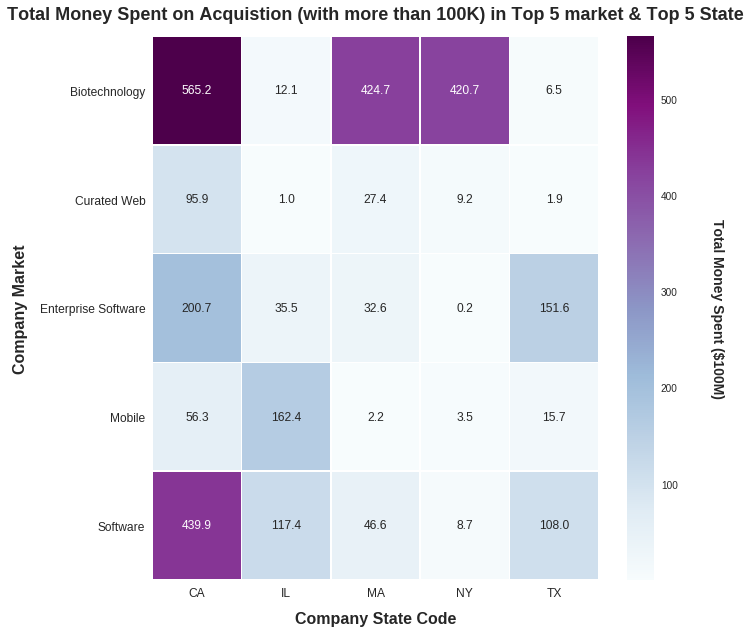

In [49]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(acquired_companies_in_top5_state_and_market_pivot, annot=True, linewidths=0.5, annot_kws={"size": 12}, fmt=".1f", ax=ax, cmap="BuPu")
ax.set_label("Total Money Spent ($100M)")
ax.text(1.25, 0.5, "Total Money Spent ($100M)", weight='bold', 
        rotation=270, size=14, ha='left', va='center', transform=ax.transAxes)
plt.ylabel("Company Market", fontsize=16, labelpad=12, weight='bold')
plt.xlabel("Company State Code", fontsize=16, labelpad=12, weight='bold')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(rotation = 360, fontsize=12)
plt.title("Total Money Spent on Acquistion (with more than 100K) in Top 5 market & Top 5 State", fontsize = 18, weight='bold', y =1.02);

## 11. Funding amount distribution in each quarter from 2007 to 2014 for main funding type

Funding type activitity 

*   Companies have raised much money from venture and private_equity than seed and angel. 

*   Total captital goes the most in the first quarter of the year.  



In [0]:
rounds = rounds[rounds.funded_year>=2007]
funding_type = rounds[['funding_round_type','funded_quarter','raised_amount_usd']].dropna()
# funding_type = funding_type[~funding_type.raised_amount_usd.str.contains('-')]
# funding_type['raised_amount_usd'] = pd.to_numeric(funding_type.raised_amount_usd.str.replace(',',''))
funding_by_type_and_year = funding_type.groupby(['funding_round_type','funded_quarter'], as_index = False)[['raised_amount_usd']].sum()
mian_funding_type = ['angel','seed','venture','private_equity']
funding_by_miantype_and_year = funding_by_type_and_year[funding_by_type_and_year.funding_round_type.isin(mian_funding_type)]
funding_by_miantype_and_year_pivot = pd.pivot_table(funding_by_miantype_and_year, values = 'raised_amount_usd', 
                                                    index = 'funded_quarter', columns = 'funding_round_type')
funding_by_miantype_and_year_pivot = (funding_by_miantype_and_year_pivot/1000000).round(0)

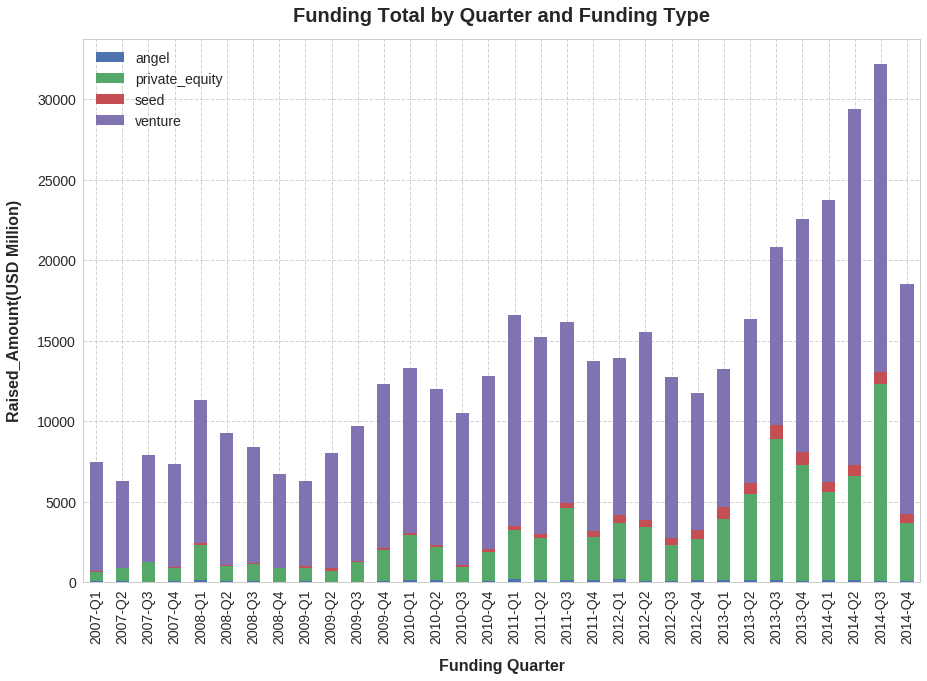

In [51]:
funding_by_miantype_and_year_pivot.plot(kind = 'bar', figsize = (15,10), stacked = True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Funding Quarter', fontsize = 16, weight='bold', labelpad = 15)
plt.ylabel('Raised_Amount(USD Million)', fontsize = 16, weight='bold', labelpad = 15)
plt.title('Funding Total by Quarter and Funding Type', weight='bold', fontsize = 20, y=1.02)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize = 14);